# 붓꽃 품종 분류 문제

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = load_iris()

iris_data = iris.data
iris_label = iris.target

print(f'target : {iris_label}')
print(f'target label : {iris.target_names}')

target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target label : ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print(f'sample data cnt : {len(df)}')
df['label'] = iris.target
df.head()

sample data cnt : 150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


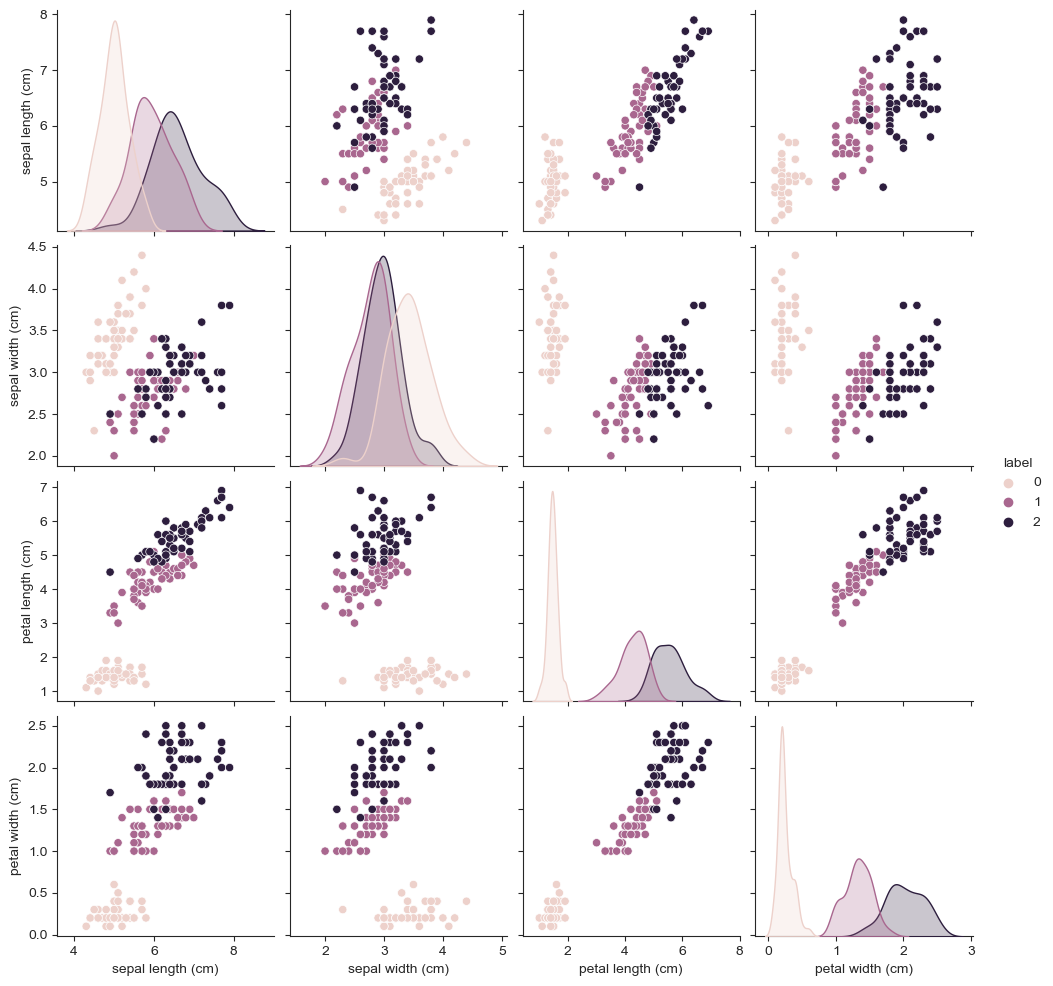

In [5]:
sns.set_style("ticks")
g = sns.pairplot(df, hue="label")

<Axes: xlabel='label', ylabel='sepal width (cm)'>

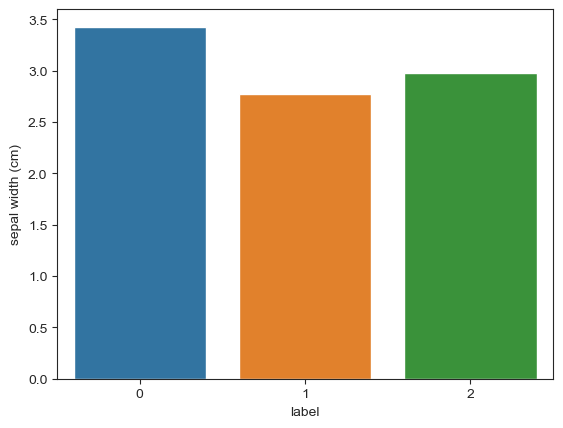

In [6]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x="label", y="sepal width (cm)", data=df, errorbar=None)

<Axes: >

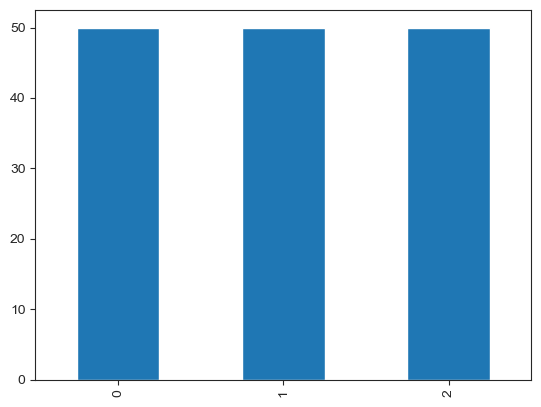

In [7]:
# sample 데이터 중 Species 열에서 각 품종이 몇 개 있는지 확인
df['label'].value_counts().plot(kind='bar')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=1)

In [12]:
def to_one_hot(labels):
    dimension = max(labels) + 1
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [14]:
# 원-핫 인코딩
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 모델 정의
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 중 과적합 방지를 위한 EarlyStopping 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 학습 실행
history = model.fit(
    X_train, y_train,
    epochs=50,               # 에포크 수 제한
    batch_size=32,           # 배치 크기 증가
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # 콜백 추가
)

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))